In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# Seaborn

------------------------

# 시각화의 목적에 따른 플롯

- 데이터 분포 파악
- 데이터 관계 파악
- **집단간 비교**
- **시간에 따른 변화**

## 3. 집단 간 비교

: 그룹별 데이터 분포 비교
- FacetGrid를 이용한 범주형 플롯 시각화
    

- 박스플롯(boxplot)
    - matplotlib.pyplot.boxplot()
    - DataFrame.plot(kind='box')
    - DataFrame.plot.box()
    - DataFrame.boxplot()
    - seaborn.boxplot()
    - seaborn.catplot(kind='box') 

- 막대그래프(barplot)
    - matplotlib.pyplot.bar()
    - matplotlib.pyplot.barh()
    - DataFrame.plot(kind='bar'|'barh')
    - DataFrame.plot.bar()
    - DataFrame.plot.barh()
    - seaborn.barplot()
    - seaborn.catplot(kind='bar')

- 빈도 플롯 (countplot)
    - seaborn.countplot()
    - seaborn.catplot(kind='count')

- 바이올린플롯(violin plot)
    - matplotlib.pyplot.violinplot()
    - seaborn.viloinplot()
    - seaborn.catplot(kind='violin')

- strip plot
    - seaborn.stripplot()
    - seaborn.catplot(kind='strip')

- swarm plot
    - seaborn.swarmplot()
    - seaborn.catplot(kind='swarm')

### 1) 막대 그래프(barplot)

- 범주형 데이터의 범주별 빈도 비교

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### ① matplotlib.pyplot의 막대그래프 함수

- 형식
    - bar(x, height, width=0.8, bottom=None, align='center', data=None,...)
    - barh(y, width, height=0.8, left=None, *, align='center', **kwargs)

In [6]:
survived = titanic.survived.value_counts()
survived

survived
0    549
1    342
Name: count, dtype: int64

In [7]:
survived.index=['사망', '생존']
survived

사망    549
생존    342
Name: count, dtype: int64

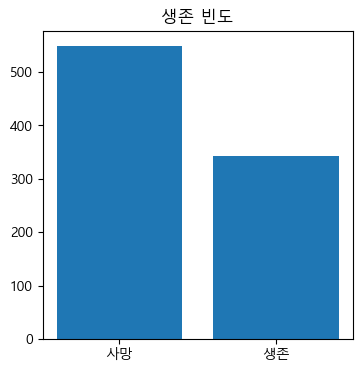

In [8]:
plt.figure(figsize=(4,4))
plt.bar(x=survived.index, height=survived.values)
plt.title('생존 빈도')
plt.show()

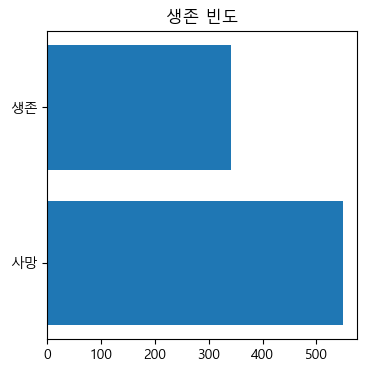

In [9]:
plt.figure(figsize=(4,4))
plt.barh(y=survived.index, width=survived.values)
plt.title('생존 빈도')
plt.show()

### ② seaborn의 막대그래프 함수

- 형식1
    - barplot(x=None, y=None, hue=None, data=None, order=None, orient='v'|'h', dodge=True, ...)
    - https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
    
    

- 형식2
    - catplot(kind='bar', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.barplot()

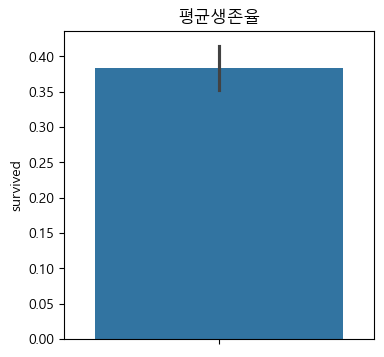

In [200]:
plt.figure(figsize=(4,4))
sns.barplot(data=titanic, y='survived')
plt.title('평균생존율')
plt.show()

In [12]:
survived / 891

사망    0.616162
생존    0.383838
Name: count, dtype: float64

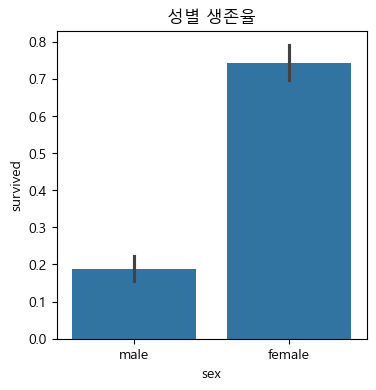

In [16]:
plt.figure(figsize=(4,4))
sns.barplot(data=titanic, x='sex', y='survived')
plt.title('성별 생존율')
plt.show()

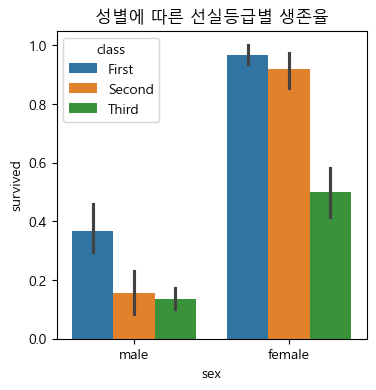

In [21]:
plt.figure(figsize=(4,4))
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.title('성별에 따른 선실등급별 생존율')
plt.show()

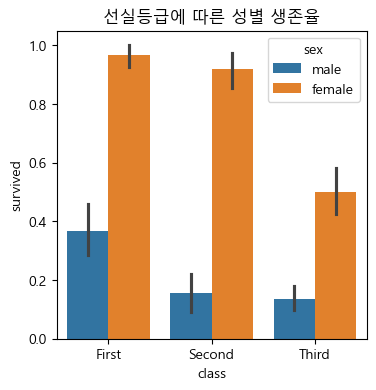

In [24]:
plt.figure(figsize=(4,4))
sns.barplot(data=titanic, hue='sex', y='survived', x='class')
plt.title('선실등급에 따른 성별 생존율')
plt.show()

- 겹친막대그래프(stacked bar chart)

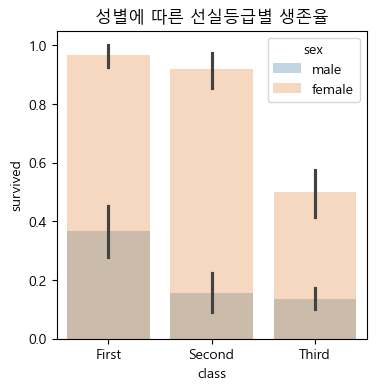

In [34]:
plt.figure(figsize=(4,4))
sns.barplot(data=titanic, hue='sex', y='survived', x='class', alpha=0.3, dodge=False)
plt.title('성별에 따른 선실등급별 생존율')
plt.show()

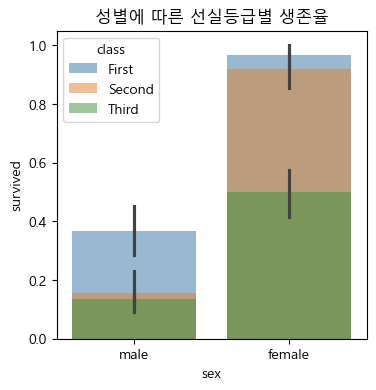

In [37]:
plt.figure(figsize=(4,4))
sns.barplot(data=titanic, x='sex', y='survived', alpha=0.5, hue='class', dodge=False)
plt.title('성별에 따른 선실등급별 생존율')
plt.show()

### sns.countplot()

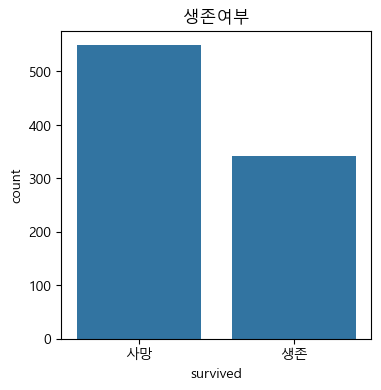

In [204]:
plt.figure(figsize=(4,4))
sns.countplot(data=titanic, x='survived')
plt.title('생존여부')
plt.xticks([0,1], ['사망', '생존'])
plt.show()

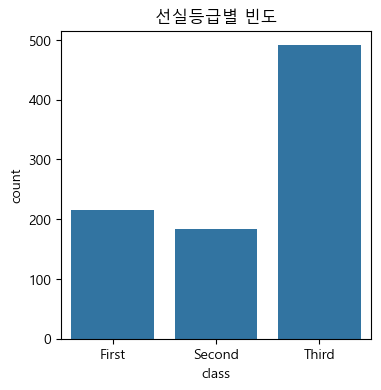

In [207]:
plt.figure(figsize=(4,4))
sns.countplot(data=titanic, x='class')
plt.title('선실등급별 빈도')
plt.show()

### sns.catplot(kind='bar')

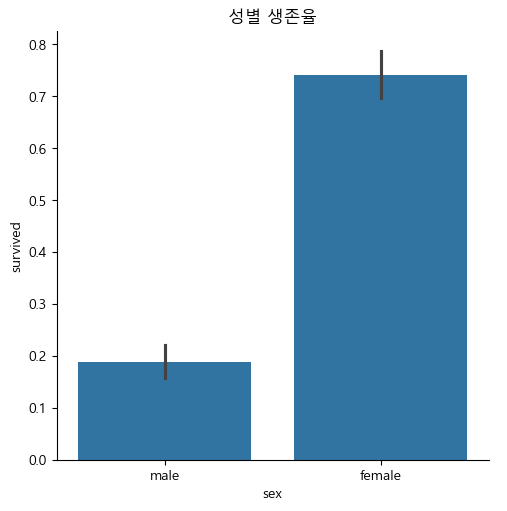

In [28]:
sns.catplot(kind='bar', data=titanic, x='sex', y='survived')
plt.title('성별 생존율')
plt.show()

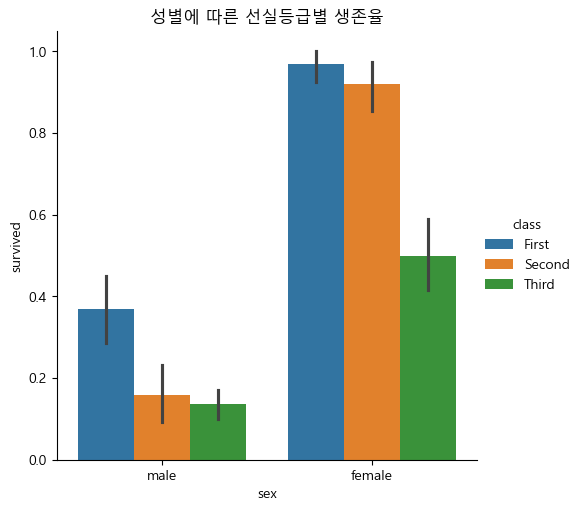

In [29]:
sns.catplot(kind='bar', data=titanic, x='sex', y='survived', hue='class')
plt.title('성별에 따른 선실등급별 생존율')
plt.show()

#### catplot()의 col인수
- 윈도우에 범주별 막대그래프를 따로 표현

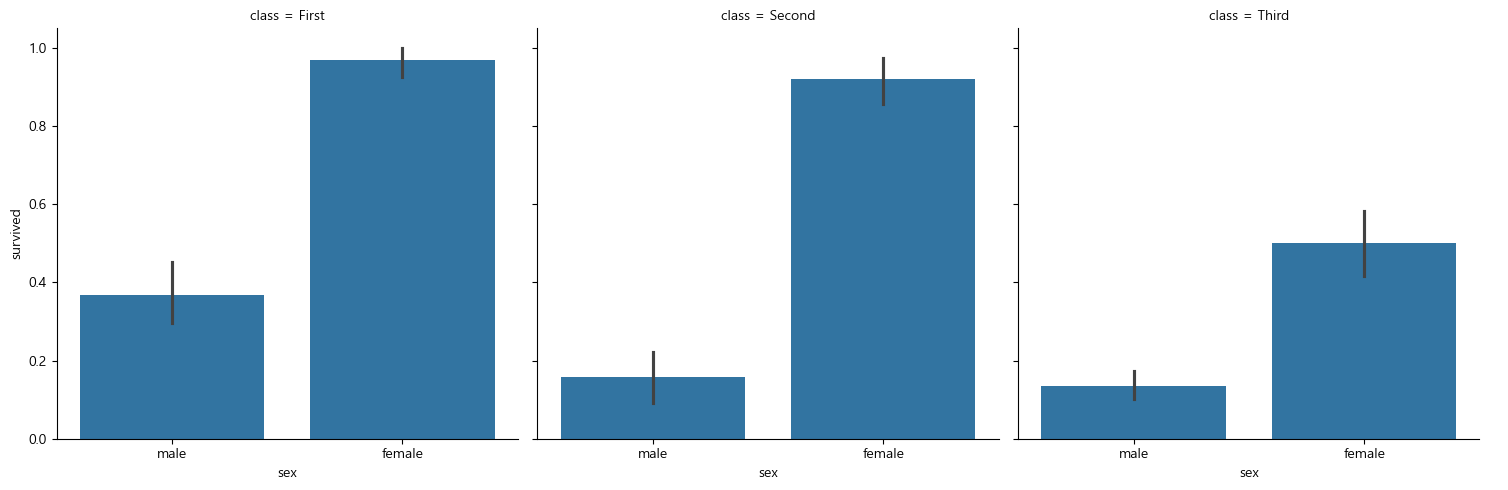

In [31]:
sns.catplot(kind='bar', data=titanic, x='sex', y='survived', col='class')
plt.show()

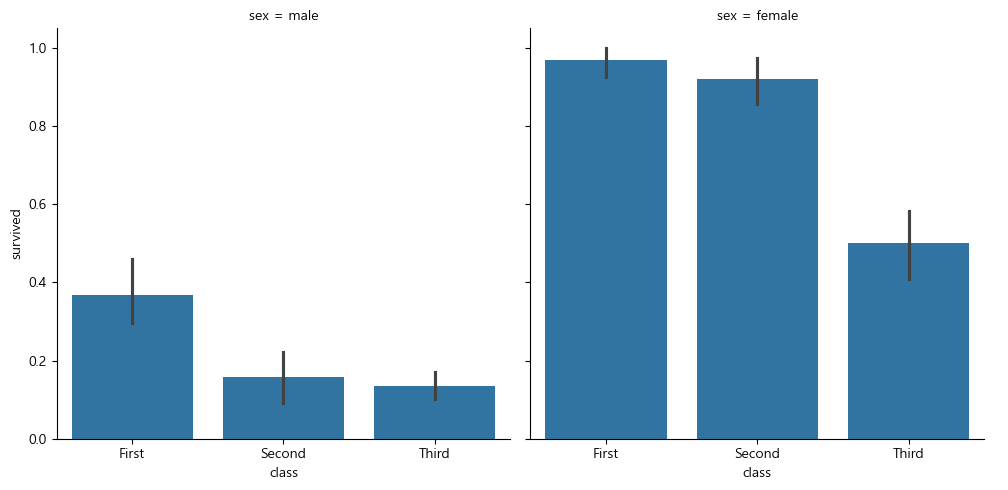

In [32]:
sns.catplot(kind='bar', data=titanic, col='sex', y='survived', x='class')
plt.show()

### 2) 바이올린 플롯

- 박스플롯의 기능과 함께 데이터의 커널밀도곡선을 제시
- 데이터의 분포와 범위를 한눈에 보기 쉽게 나타내는 그래프
- 더 실제에 가까운 분포를 알 수 있음

#### 예제 데이터. iris dataset

In [38]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### ① matplotlib.pyplot의 바이올린 플롯 함수

- 형식
    - violinplot(dataset, positions=None, vert=True, widths=0.5,  *, data=None)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html

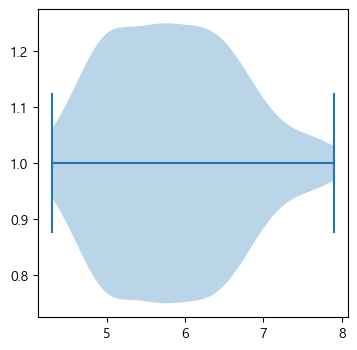

In [41]:
plt.figure(figsize=(4,4))
plt.violinplot(iris.sepal_length, vert=False)
plt.show()

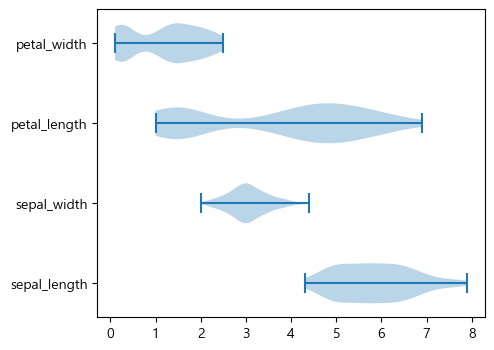

In [49]:
plt.figure(figsize=(5,4))
plt.violinplot(iris.iloc[:,:-1], vert=False)
plt.yticks([1,2,3,4], iris.columns[:-1])
plt.show()

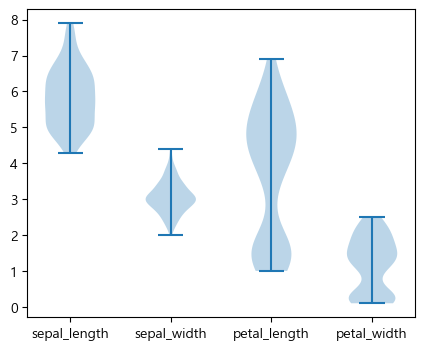

In [51]:
plt.figure(figsize=(5,4))
plt.violinplot(iris.iloc[:,:-1], vert=True)
plt.xticks([1,2,3,4], iris.columns[:-1])
plt.show()

### ② seaborn의 바이올린 플롯 함수

- 형식1
    - violinplot(x=None, y=None, hue=None, data=None, order=None, ...)
    - https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
    
    
- 형식2
    - catplot(kind='violin', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.violinplot()

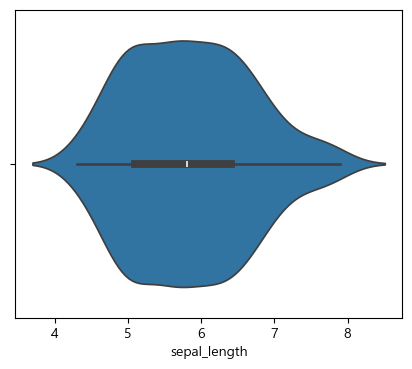

In [53]:
plt.figure(figsize=(5,4))
sns.violinplot(data=iris, x='sepal_length')
plt.show()

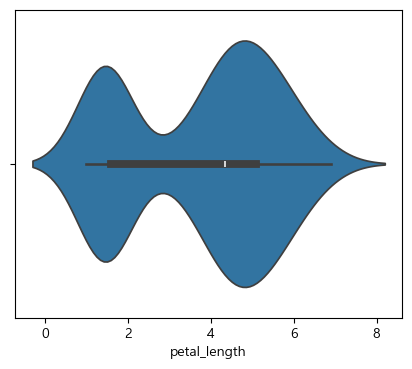

In [54]:
plt.figure(figsize=(5,4))
sns.violinplot(data=iris, x='petal_length')
plt.show()

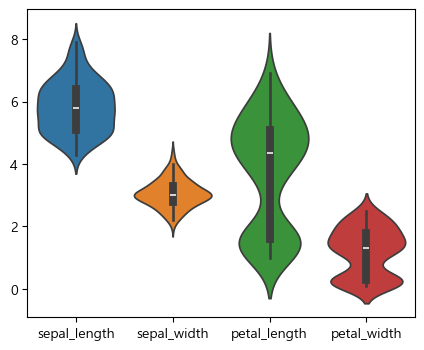

In [55]:
plt.figure(figsize=(5,4))
sns.violinplot(data=iris)
plt.show()

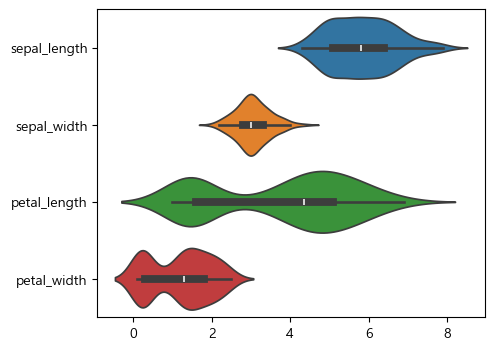

In [56]:
plt.figure(figsize=(5,4))
sns.violinplot(data=iris, orient='h')
plt.show()

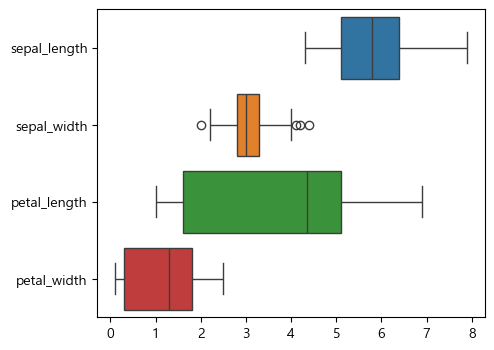

In [60]:
plt.figure(figsize=(5,4))
sns.boxplot(data=iris, orient='h')
plt.show()

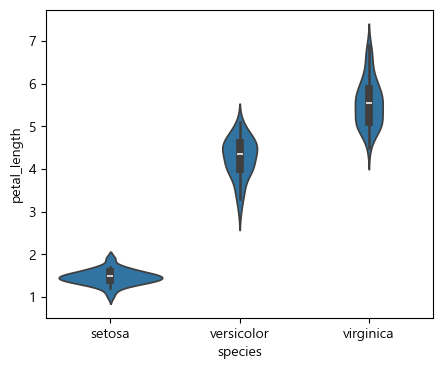

In [64]:
plt.figure(figsize=(5,4))
sns.violinplot(data=iris, x='species', y='petal_length')
plt.show()

### sns.catplot(kind='violin')

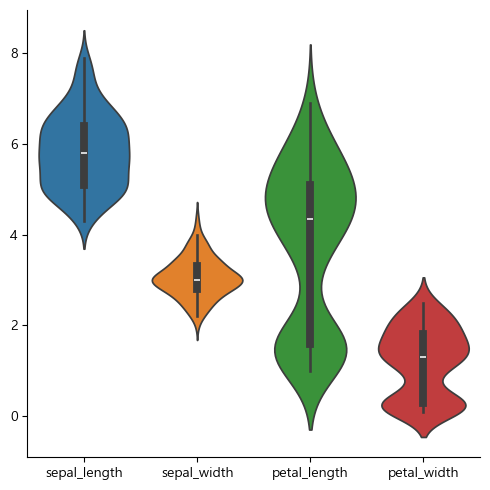

In [65]:
sns.catplot(kind='violin', data=iris)
plt.show()

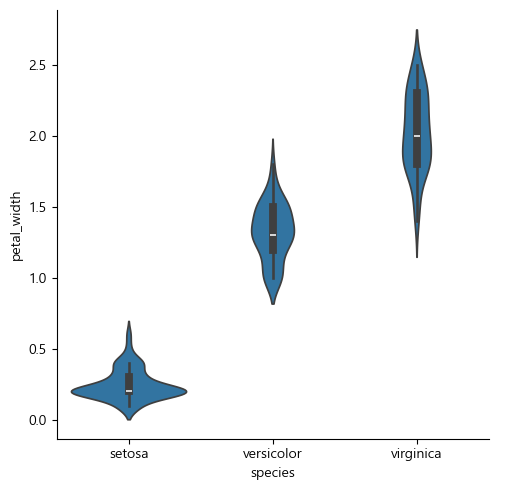

In [66]:
sns.catplot(kind='violin', data=iris, x='species', y='petal_width')
plt.show()

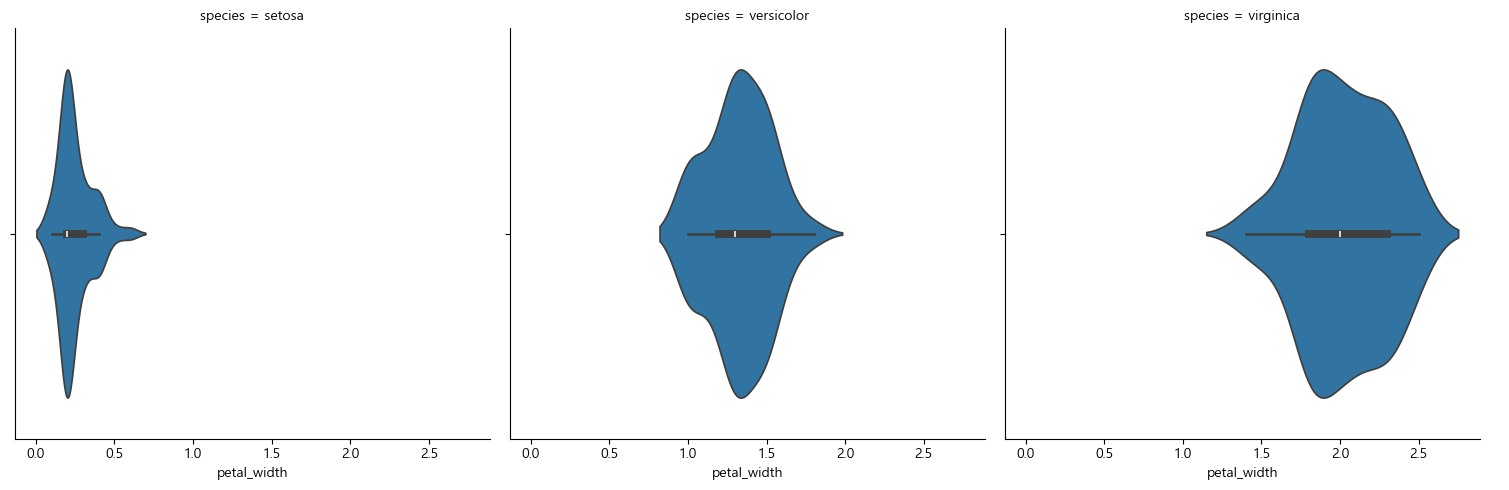

In [67]:
sns.catplot(kind='violin', data=iris, col='species', x='petal_width')
plt.show()

### 3) Strip plot

- 겹치는 데이터를 파악할 수 있도록 같은 값에 jitter를 통해 겹치지 않게 그려주는 그래프

### seaborn의 strip plot 함수

- 형식1
    - stripplot(x=None, y=None, hue=None, data=None, order=None, jitter=True, ...)
    - https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot
    
    
- 형식2
    - catplot(kind='strip', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.stripplot()

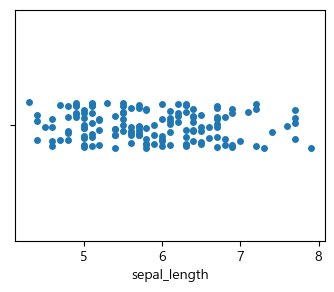

In [68]:
plt.figure(figsize=(4,3))
sns.stripplot(data=iris, x='sepal_length')
plt.show()

In [70]:
iris.sepal_length.value_counts().sort_index()

sepal_length
4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
Name: count, dtype: int64

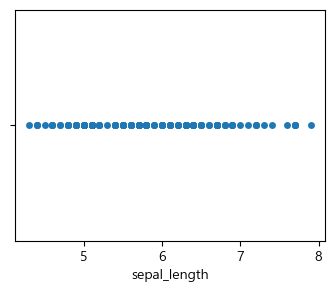

In [71]:
plt.figure(figsize=(4,3))
sns.stripplot(data=iris, x='sepal_length', jitter=False)
plt.show()

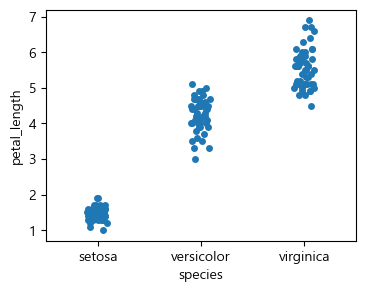

In [72]:
plt.figure(figsize=(4,3))
sns.stripplot(data=iris, x='species', y='petal_length')
plt.show()

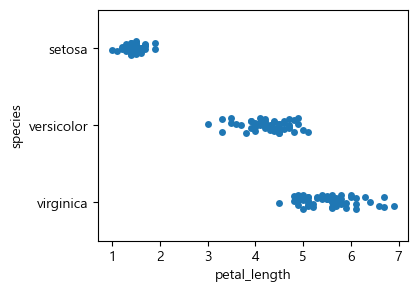

In [73]:
plt.figure(figsize=(4,3))
sns.stripplot(data=iris, y='species', x='petal_length')
plt.show()

### sns.catplot(kind='strip')

<Figure size 400x300 with 0 Axes>

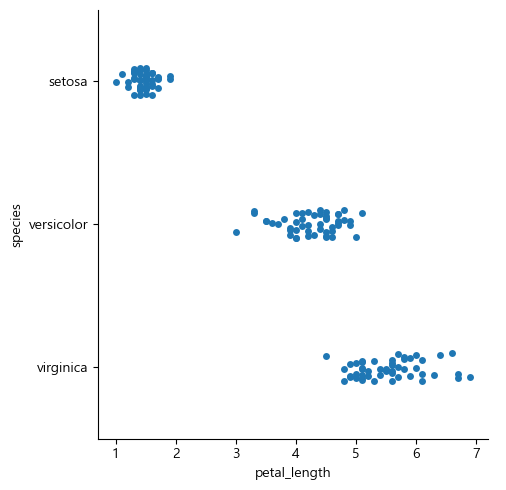

In [75]:
plt.figure(figsize=(4,3))
sns.catplot(kind='strip', data=iris, y='species', x='petal_length')
plt.show()

### 4) Swarm plot

- 데이터의 분산까지 고려하여 겹치는 데이터를 겹치지 않게 그려주는 그래프
- 데이터가 퍼져 있는 정도를 입체적으로 볼 수 있음

### seaborn의 swarm plot 함수

- 형식1
    - swarmplot(x=None, y=None, hue=None, data=None, order=None, ...)
    - https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot
    
    

- 형식2
    - catplot(kind='swarm', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

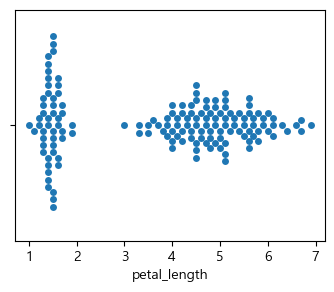

In [76]:
plt.figure(figsize=(4,3))
sns.swarmplot(data=iris, x='petal_length')
plt.show()

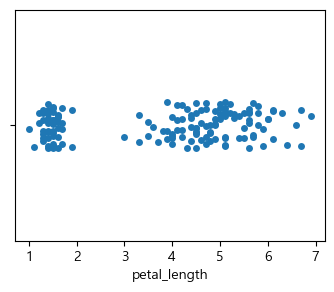

In [78]:
plt.figure(figsize=(4,3))
sns.stripplot(data=iris, x='petal_length')
plt.show()

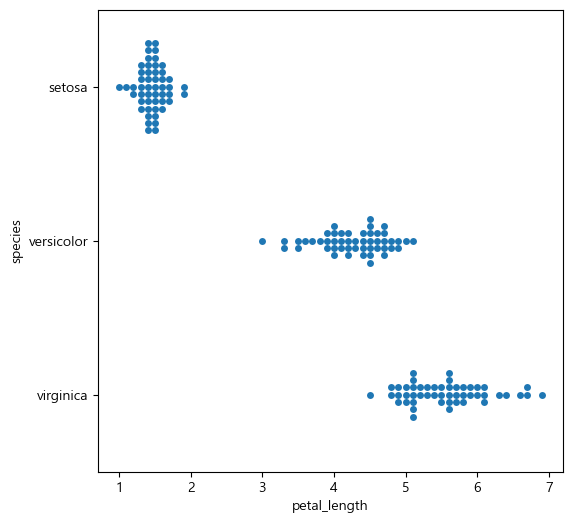

In [80]:
plt.figure(figsize=(6,6))
sns.swarmplot(data=iris, x='petal_length', y='species')
plt.show()

#### box plot과 swarmplot을 같이 표시

C:\Users\acorn1\AppData\Local\Temp\ipykernel_13728\4098127163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=iris, x='petal_length', y='species', palette='Set2')


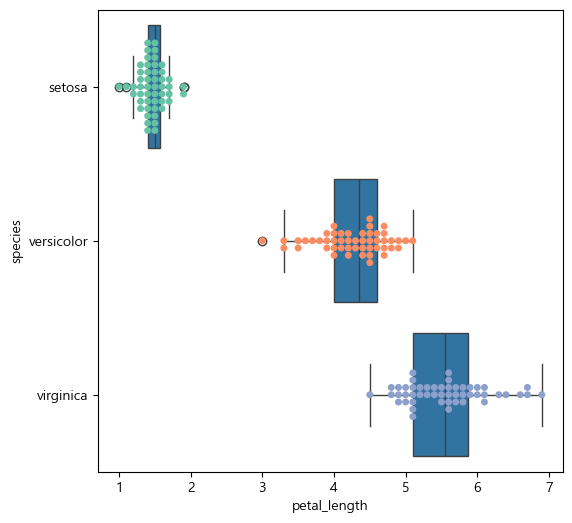

In [85]:
plt.figure(figsize=(6,6))
sns.boxplot(data=iris, x='petal_length', y='species')
sns.swarmplot(data=iris, x='petal_length', y='species', palette='Set2')
plt.show()

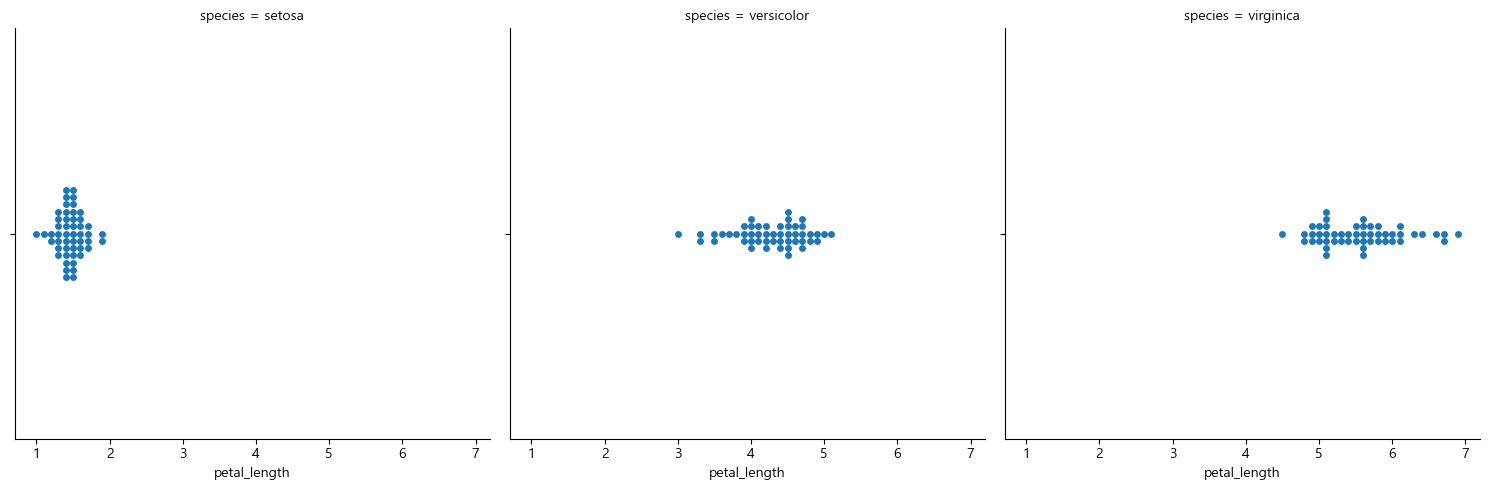

In [89]:
sns.catplot(kind='swarm', data=iris, x='petal_length', col='species')
plt.show()

------

## 4. 시간에 따라 변화하는 데이터 표현

- 시계열 데이터 시각화
- 시간에 따른 추세 파악
- 선그래프(line plot)
    - matplotlib.pyplot.plot()
    - seaborn.lineplot()
    - seaborn.relplot(kind='line')
    - DataFrame.plot(kind='line')
    - DataFrame.plot.line()

### 예제 데이터. 미세먼지

In [93]:
dust = pd.read_excel('data/fine_dust.xlsx', index_col=[0])
dust.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
area,,,,,,,,,,,,,,,,,,,
Seoul,71.0,76.0,69.0,61.0,58.0,60,61,55.0,54.0,49.0,47,41.0,45.0,46.0,45.0,48.0,44.0,40.0,42.0
Gyeonggi,71.0,74.0,68.0,67.0,65.0,68,66,60.0,60.0,58.0,56,49.0,54.0,54.0,53.0,53.0,51.0,44.0,46.0
Incheon,52.0,57.0,61.0,62.0,61.0,68,64,57.0,60.0,55.0,55,47.0,49.0,49.0,53.0,49.0,46.0,40.0,43.0
Busan,60.0,69.0,55.0,60.0,58.0,59,57,51.0,49.0,49.0,47,43.0,49.0,48.0,46.0,44.0,44.0,41.0,36.0
Daegu,67.0,71.0,59.0,0.0,55.0,54,53,57.0,48.0,51.0,47,42.0,45.0,45.0,46.0,43.0,42.0,39.0,39.0


In [94]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Seoul to Jeju
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    14 non-null     float64
 1   2002    14 non-null     float64
 2   2003    14 non-null     float64
 3   2004    14 non-null     float64
 4   2005    14 non-null     float64
 5   2006    14 non-null     int64  
 6   2007    14 non-null     int64  
 7   2008    14 non-null     float64
 8   2009    14 non-null     float64
 9   2010    14 non-null     float64
 10  2011    14 non-null     int64  
 11  2012    14 non-null     float64
 12  2013    14 non-null     float64
 13  2014    14 non-null     float64
 14  2015    14 non-null     float64
 15  2016    14 non-null     float64
 16  2017    14 non-null     float64
 17  2018    14 non-null     float64
 18  2019    14 non-null     float64
dtypes: float64(16), int64(3)
memory usage: 2.2+ KB


### ① matplotlib의 plot()을 이용하여 라인플롯 그리기

- 형식 : plot(x, y, fmt, ..., data=None, scalex=True, scaley=True, **kwargs)
    - x, y : array-like or scalar
    - fmt : str, optional

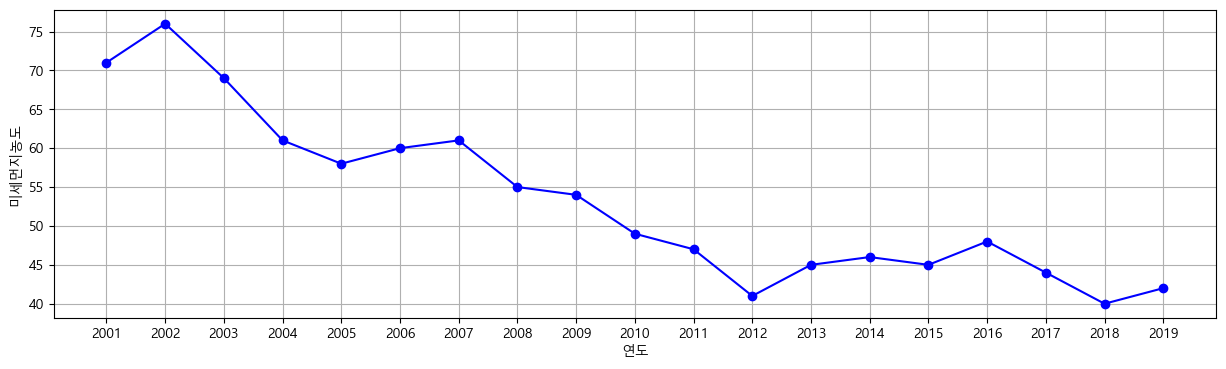

In [100]:
plt.figure(figsize=(15,4))
plt.plot(dust.loc['Seoul'], color='b', marker='o')
plt.xlabel('연도')
plt.ylabel('미세먼지농도')
plt.xticks(range(2001,2020))
plt.grid()
plt.show()

#### plot()의 data 인수
- indexable object : If given, provide the label names to plot in x and y.

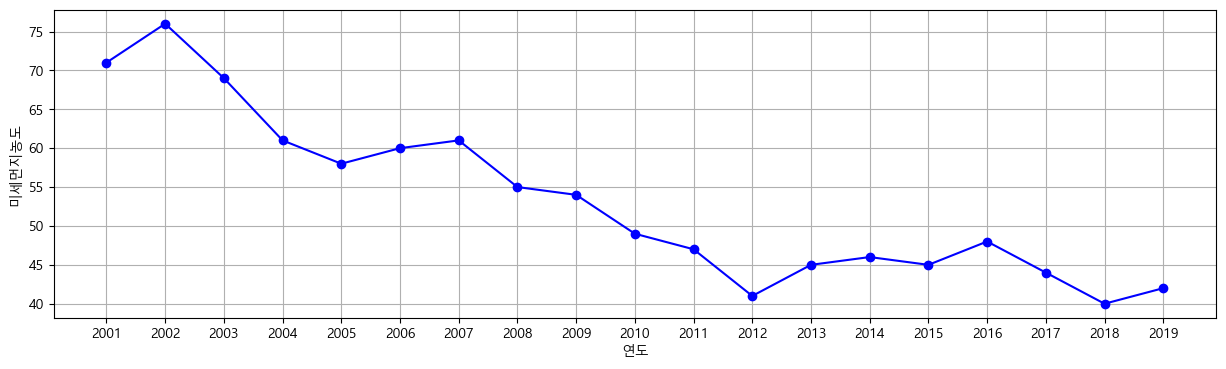

In [104]:
dustT = dust.T
plt.figure(figsize=(15,4))
plt.plot(dustT.index, 'Seoul', data=dustT, color='b', marker='o')
plt.xlabel('연도')
plt.ylabel('미세먼지농도')
plt.xticks(range(2001,2020))
plt.grid()
plt.show()

### ② seaborn의 선그래프 함수 이용

- 형식1.
    - lineplot(* , x=None, y=None, hue=None, size=None, style=None, data=None, palette=None,...)
    - https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
    
    

- 형식2.
    - relplot(kind='line', x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

### sns.lineplot()

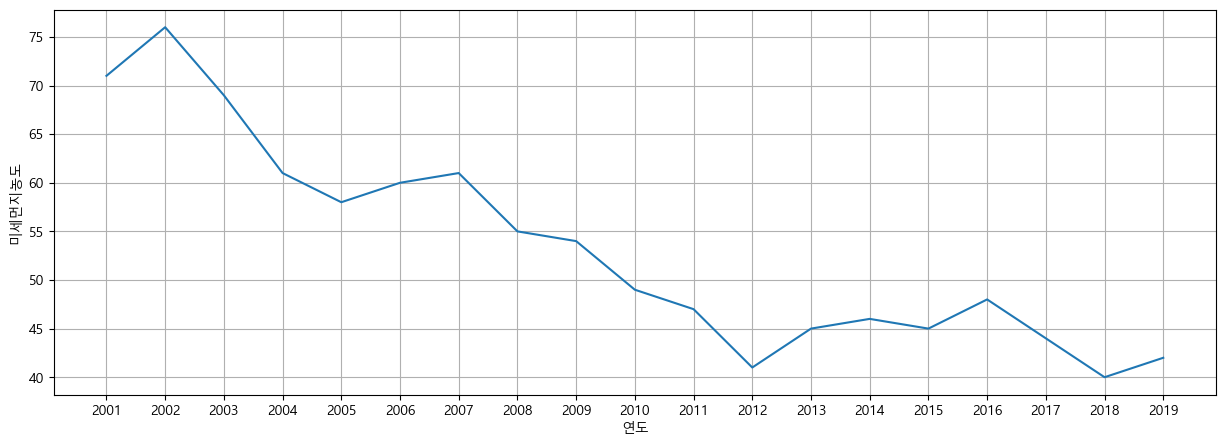

In [110]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dustT, x=dustT.index, y='Seoul')
plt.xlabel('연도')
plt.ylabel('미세먼지농도')
plt.xticks(range(2001,2020))
plt.grid()
plt.show()

In [111]:
dustT.head()

area,Seoul,Gyeonggi,Incheon,Busan,Daegu,Gwangju,Daejeon,Ulsan,Sejong,Gangwon,Chungcheong,Jeolla,Gyeongsang,Jeju
2001,71.0,71.0,52.0,60.0,67.0,57.0,48.0,0.0,0.0,49.0,58.5,54.5,51.0,46.0
2002,76.0,74.0,57.0,69.0,71.0,52.0,53.0,54.0,0.0,58.0,54.0,52.5,55.0,45.0
2003,69.0,68.0,61.0,55.0,59.0,36.0,43.0,40.0,0.0,57.0,52.0,44.5,52.0,37.0
2004,61.0,67.0,62.0,60.0,0.0,46.0,49.0,50.0,0.0,59.0,55.5,48.5,58.0,43.0
2005,58.0,65.0,61.0,58.0,55.0,49.0,48.0,50.0,0.0,62.0,52.0,46.5,54.5,45.0


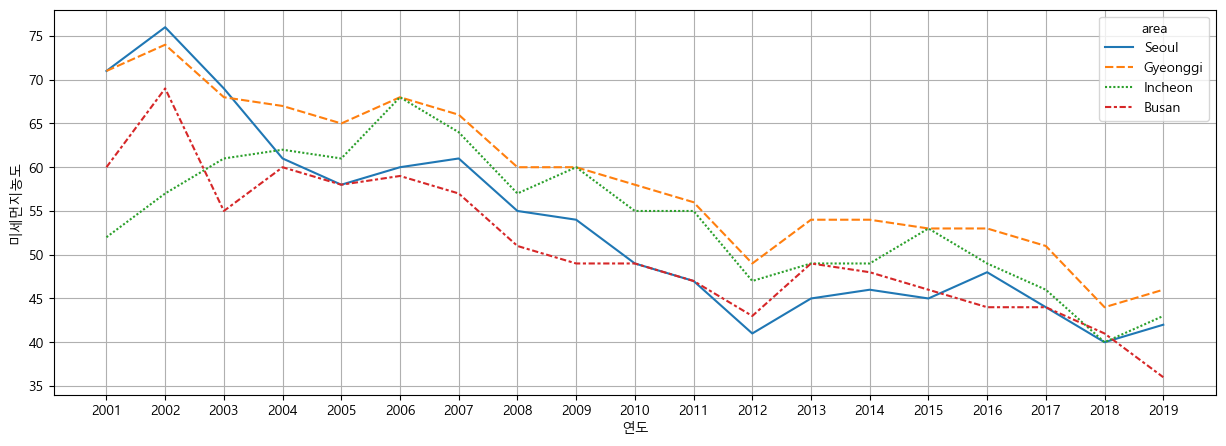

In [113]:
data = dustT[['Seoul', 'Gyeonggi', 'Incheon', 'Busan']]
plt.figure(figsize=(15,5))
sns.lineplot(data=data)
plt.xlabel('연도')
plt.ylabel('미세먼지농도')
plt.xticks(range(2001,2020))
plt.grid()
plt.show()

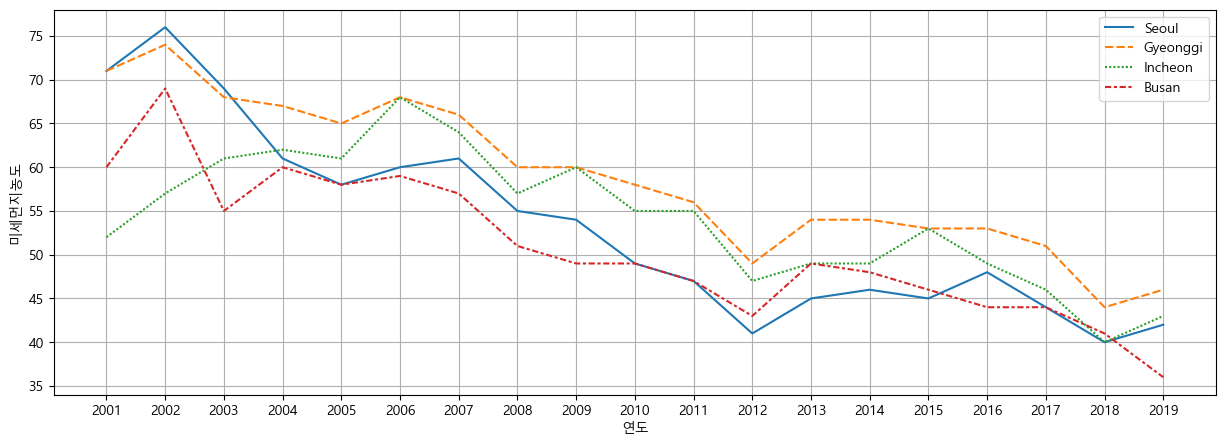

In [116]:
data = dustT[['Seoul', 'Gyeonggi', 'Incheon', 'Busan']]
plt.figure(figsize=(15,5))
sns.lineplot(data=data)
plt.xlabel('연도')
plt.ylabel('미세먼지농도')
plt.xticks(range(2001,2020))
plt.legend(fontsize=10, loc='best')
plt.grid()
plt.show()

#### seaborn의 set_style() 이용하여 라인플롯 그리기

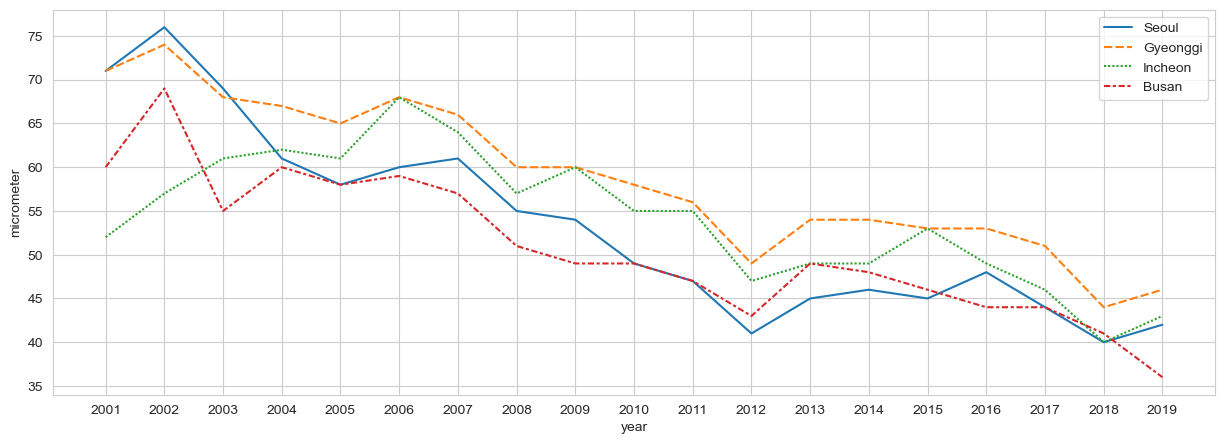

In [120]:
sns.set_style('whitegrid')
data = dustT[['Seoul', 'Gyeonggi', 'Incheon', 'Busan']]
plt.figure(figsize=(15,5))
sns.lineplot(data=data)
plt.xlabel('year')
plt.ylabel('micrometer')
plt.xticks(range(2001,2020))
plt.legend(fontsize=10, loc='best')
plt.show()

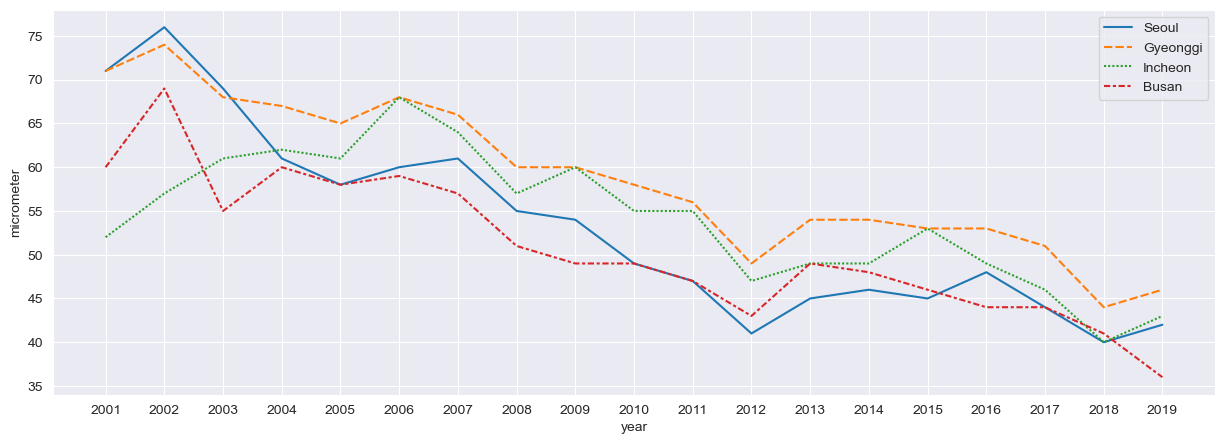

In [121]:
sns.set_style('darkgrid')
data = dustT[['Seoul', 'Gyeonggi', 'Incheon', 'Busan']]
plt.figure(figsize=(15,5))
sns.lineplot(data=data)
plt.xlabel('year')
plt.ylabel('micrometer')
plt.xticks(range(2001,2020))
plt.legend(fontsize=10, loc='best')
plt.show()

**sns.despine() 함수를 이용한 그림 테두리 제거**

: sns.despine(right=True,left=True,top=False,bottom=False)

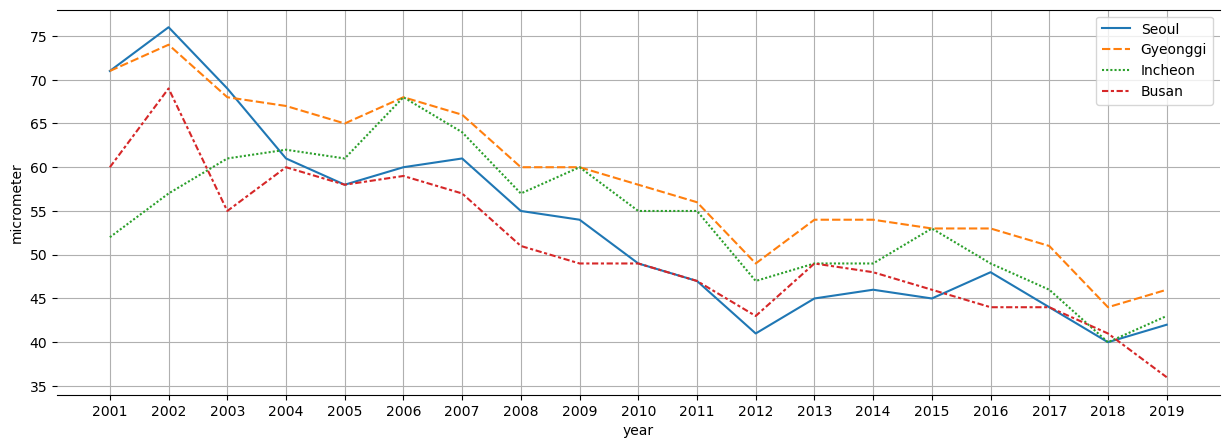

In [128]:
plt.rcdefaults() # 설정 초기화
# sns.set_theme()
data = dustT[['Seoul', 'Gyeonggi', 'Incheon', 'Busan']]
plt.figure(figsize=(15,5))
sns.lineplot(data=data)
sns.despine(right=True, left=True, top=False)
plt.xlabel('year')
plt.ylabel('micrometer')
plt.xticks(range(2001,2020))
plt.legend(fontsize=10, loc='best')
plt.grid()
plt.show()

### ③ pandas.DataFrame.plot(kind='line') 이용

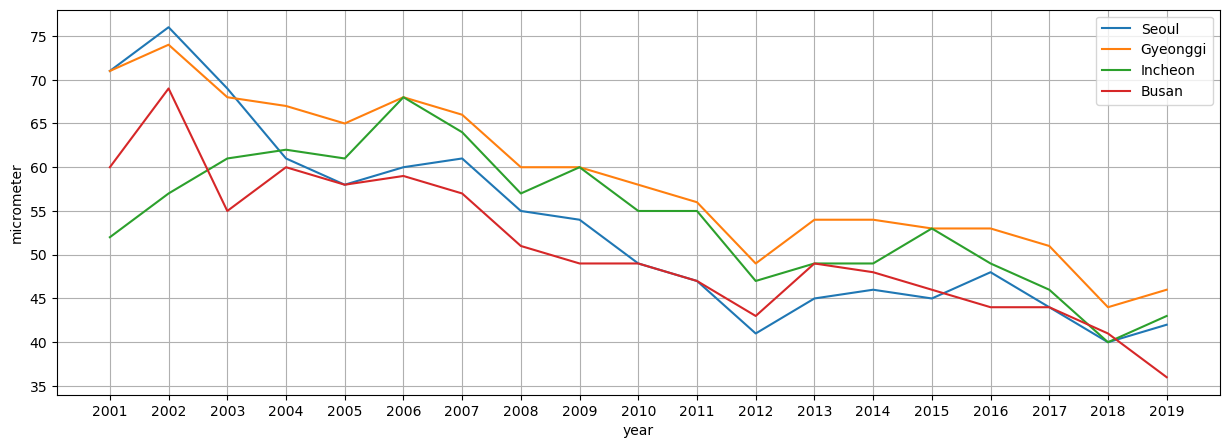

In [132]:
data = dustT[['Seoul', 'Gyeonggi', 'Incheon', 'Busan']]
data.plot(figsize=(15,5), xlabel='year', ylabel='micrometer')
plt.xticks(range(2001,2020))
plt.legend(fontsize=10, loc='best')
plt.grid()
plt.show()

------------------------------------------------

## 5. 히트맵(heatmap)

### (1) seaborn의 heatmap() 함수 사용

- 범주형-범주형-수치형 자료의 시각화
    - X축과 Y축에 2개의 범주형 자료의 계급(class)별로 연속형 자료를 집계한 자료의 시각화
- 집계한 값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화


- 형식 : heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)


- https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

### 예제 데이터
- 캐글 자전거수요예측 데이터
- https://www.kaggle.com/competitions/bike-sharing-demand

In [133]:
bike = pd.read_csv('data/bike.csv')

In [134]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [135]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- datetime : hourly date + timestamp (날짜와 시간)

- season : 1 = spring, 2 = summer, 3 = fall, 4 = winter (계절)

- holiday : whether the day is considered a holiday (휴일)

- workingday ; whether the day is neither a weekend nor holiday (평일)

- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy (맑은 날씨)
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (안개)
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (가벼운 눈, 비)
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (폭설, 폭우)

- temp : temperature in Celsius (온도)

- atemp : “feels like” temperature in Celsius (체감 온도)

- humidity : relative humidity (상대 습도)

- windspeed : wind speed (풍속)

- casual : number of non-registered user rentals initiated (비회원 대여량)

- registered : number of registered user rentals initiated (회원 대여량)

- count : number of total rentals (총 대여량)

#### 날짜를 날짜형식 데이터 변환 후 시간, 연, 월 컬럼 추출

In [142]:
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [143]:
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour

In [144]:
bike.month.value_counts().sort_index()

month
1     884
2     901
3     901
4     909
5     912
6     912
7     912
8     912
9     909
10    911
11    911
12    912
Name: count, dtype: int64

In [145]:
bike.hour.value_counts().sort_index()

hour
0     455
1     454
2     448
3     433
4     442
5     452
6     455
7     455
8     455
9     455
10    455
11    455
12    456
13    456
14    456
15    456
16    456
17    456
18    456
19    456
20    456
21    456
22    456
23    456
Name: count, dtype: int64

In [146]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


In [148]:
bins = [-0.1,2,5,8,11,14,17,20,23]
labels = ['0~2','3~5','6~8', '9~11', '12~14', '15~17', '18~20', '21~23']
bike['hours'] = pd.cut(bike['hour'], bins=bins, labels=labels)
bike['hours'].value_counts().sort_index()

hours
0~2      1357
3~5      1327
6~8      1365
9~11     1365
12~14    1368
15~17    1368
18~20    1368
21~23    1368
Name: count, dtype: int64

#### sns.heatmap() 사용하여 계절(season)과 시간대별(hours) 자전거  총대여량 시각화

#### 데이터 피봇팅

- pivot() 함수
    - 형식1. pd.pivot(data, index=None, columns=None, values=None)
    - 형식2. 데이터프레임.pivot(index=None, columns=None, values=None)
    - https://pandas.pydata.org/docs/reference/api/pandas.pivot.html
    
    
- pivot_table() 함수
    - 형식1. pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) 
    - 형식2. 데이터프레임.pivot_table( )
    - https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [150]:
bike1 = pd.pivot_table(data=bike, index='season', columns='hours', values='count', 
                      aggfunc='sum', observed=False)
bike1

hours,0~2,3~5,6~8,9~11,12~14,15~17,18~20,21~23
season,,,,,,,,
1,6730,2215,47517,42851,53175,71955,63711,24344
2,13406,4384,80420,76620,96669,135077,129817,51889
3,17276,5638,87133,82778,102348,140410,143687,61392
4,13307,4621,81656,74185,93337,126541,107228,43159


In [151]:
bike1.index=['spring','summer','autumn','winter']
bike1

hours,0~2,3~5,6~8,9~11,12~14,15~17,18~20,21~23
spring,6730,2215,47517,42851,53175,71955,63711,24344
summer,13406,4384,80420,76620,96669,135077,129817,51889
autumn,17276,5638,87133,82778,102348,140410,143687,61392
winter,13307,4621,81656,74185,93337,126541,107228,43159


In [159]:
bike1.max().max(), bike1.min().min()

(np.int64(143687), np.int64(2215))

- heatmap()의 색상 스케일 최소값(vmin), 최대값(vmax) 인수 사용

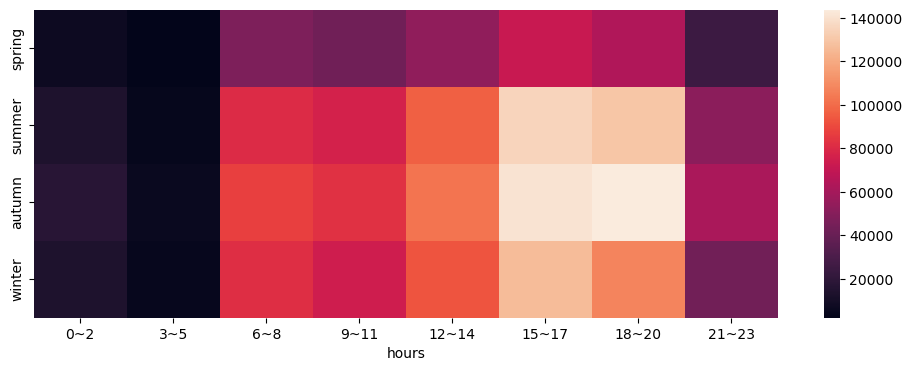

In [156]:
plt.figure(figsize=(12,4))
sns.heatmap(data=bike1)
plt.show()

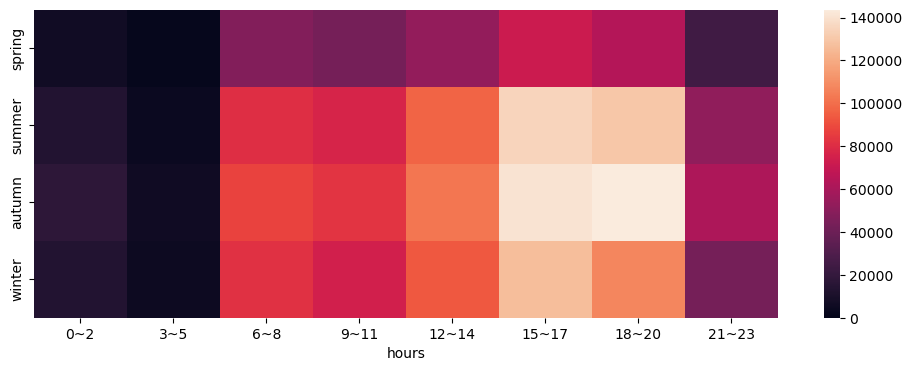

In [162]:
plt.figure(figsize=(12,4))
sns.heatmap(data=bike1, vmin=0, vmax=bike1.max().max())
plt.show()

#### heatmap()의 annot, fmt 인수
- annot=True : 히트맵의 각 셀에 값 표시
- fmt='d' or 'f' : 히트맵에 표시하는 값의 서식(format) 지정 (정수, 실수)

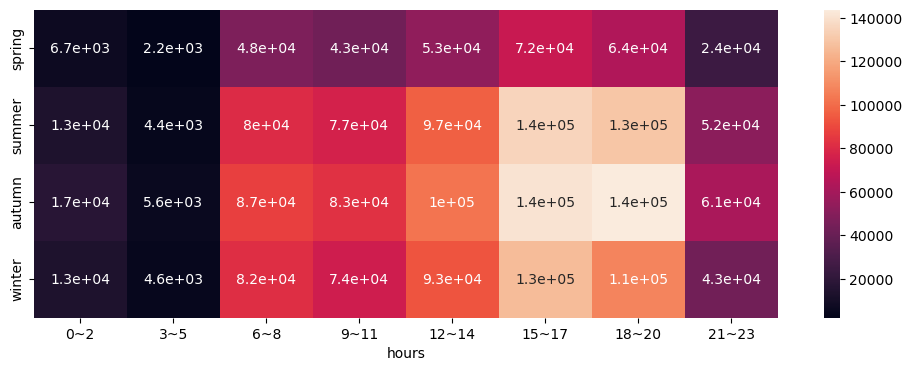

In [165]:
plt.figure(figsize=(12,4))
sns.heatmap(data=bike1,annot=True)
plt.show()

In [177]:
bike2 = pd.pivot_table(data=bike, index='season', columns='hours', values='count', 
                      aggfunc='mean', observed=False)
bike2.index=['spring','summer','autumn','winter']
bike2

hours,0~2,3~5,6~8,9~11,12~14,15~17,18~20,21~23
spring,20.210210,7.214984,140.168142,126.404130,155.482456,210.394737,186.289474,71.181287
summer,39.198830,12.932153,235.146199,224.035088,282.657895,394.961988,379.581871,151.722222
autumn,50.811765,16.533724,254.774854,242.040936,299.263158,410.555556,420.137427,179.508772
winter,38.909357,13.591176,238.760234,216.915205,272.915205,370.002924,313.532164,126.195906


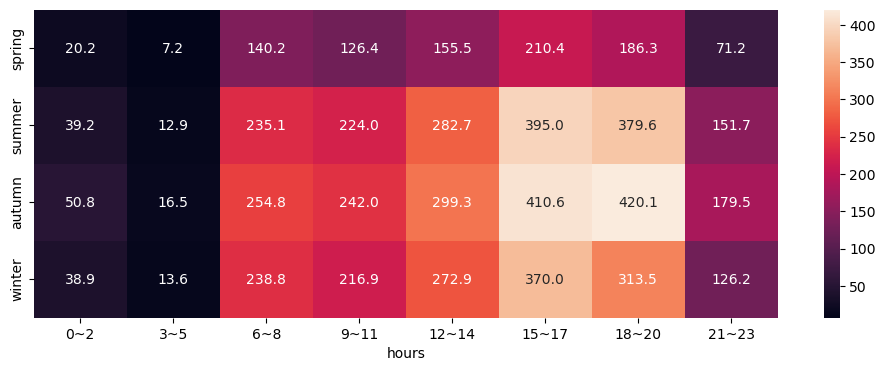

In [180]:
plt.figure(figsize=(12,4))
sns.heatmap(data=bike2,annot=True, fmt='.1f')
plt.show()

#### sns.heatmap()함수의 cmap인수 사용하여 다른 color map 지정

- color maps in Matplotlib 링크 참고: 
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

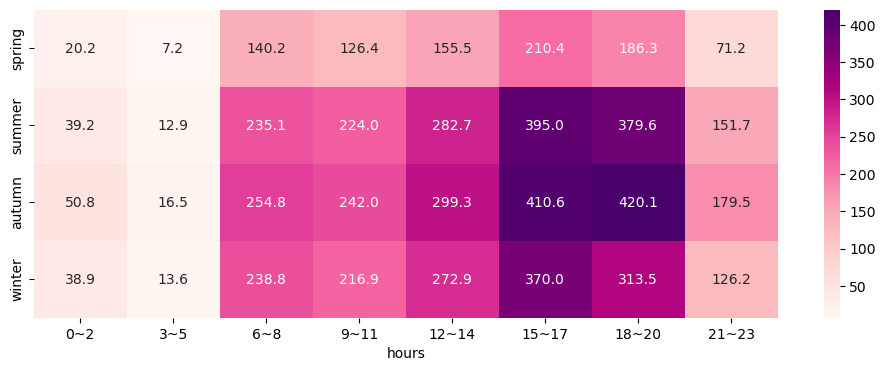

In [179]:
plt.figure(figsize=(12,4))
sns.heatmap(data=bike2,annot=True, fmt='.1f', cmap='RdPu')
plt.show()

### (2) matplotlib의 pcolor()를 이용한 heatmap 그리기

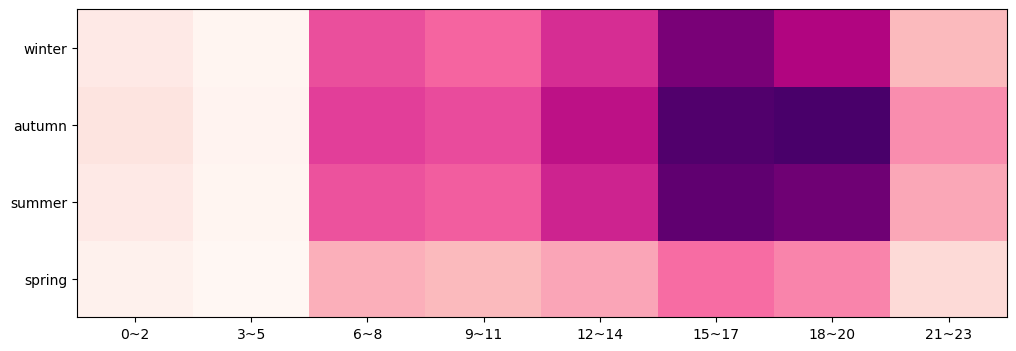

In [185]:
idx, col = bike2.index, bike2.columns
plt.figure(figsize=(12,4))
plt.pcolor(bike2, cmap='RdPu')
plt.xticks(np.arange(0.5, len(col)), col)
plt.yticks(np.arange(0.5, len(idx)), idx)
plt.show()

------------------------------------------

### 예제 데이터

- seaborn 패키지의 flights dataset

In [187]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [188]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


**heatmap을 그리기 위한 데이터 테이블 생성**
- pivot 테이블을 이용해서 연도별 각 월 승객수로 구조를 변환

In [189]:
flight2 = pd.pivot(data=flights, index='month', columns='year', values='passengers')
flight2

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


**seaborn.heatmap() 그리기**

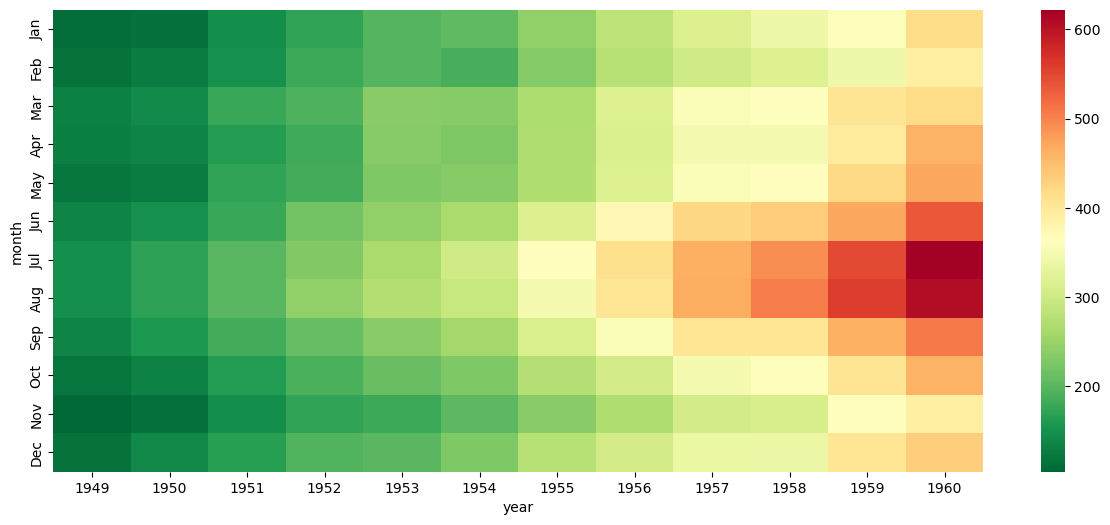

In [193]:
plt.figure(figsize=(15,6))
sns.heatmap(flight2, cmap='RdYlGn_r')
plt.show()

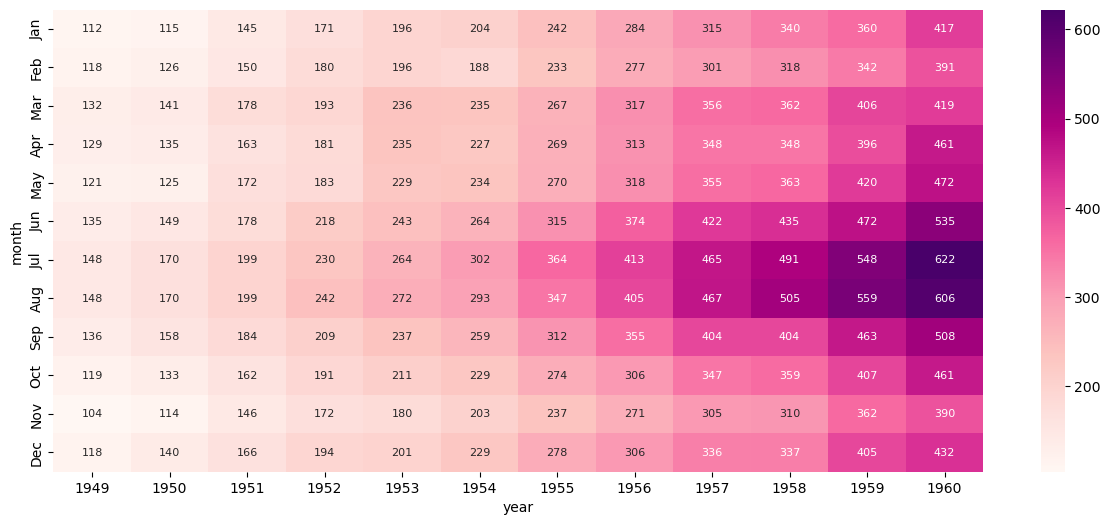

In [197]:
plt.figure(figsize=(15,6))
sns.heatmap(flight2, cmap='RdPu', annot=True, fmt='d', annot_kws={'size':8})
plt.show()

----------------------------------------------------